In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

In [2]:
df_canada = pd.read_excel(r'F:\Foundations of AI\Data Preparation\A10_DataPreperationAndVisualization-master\DataVisualization\data\canada.xlsx',
                          sheet_name = 'Canada by Citizenship',
                          skiprows = range(20),
                          skipfooter = 2)

In [3]:
df_canada.columns.tolist()
df_canada.index.tolist()

# remove unnecessary columns
# in pandas axis=0 re|presents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename some columns to make better sense
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
# convert all column names to strings
df_canada.columns = list(map(str, df_canada.columns))

# full range of the time series
years = list(map(str, range(1980, 2014)))

# add Total column
df_canada['Total'] = df_canada.sum(axis=1)

In [5]:
# sort data by Total
df_asia_to_canada = df_canada[df_canada['Continent']== 'Asia']
df_asia_to_canada.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# pick top 5 contibutors
df_top5 = df_asia_to_canada.head()['Total']
top5 = []
lost = []
for i in range(df_top5.count()):
    top5.append(df_asia_to_canada.iloc[i][0])
    lost.append(df_top5.iloc[i])
    
df_top5 = pd.Series(lost , index = top5)

# print data.
df_top5.head()

C:\Users\Mahe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


India          691904
China          659962
Philippines    511391
Pakistan       241600
Iran           175923
dtype: int64

# ANSWER 2(A)

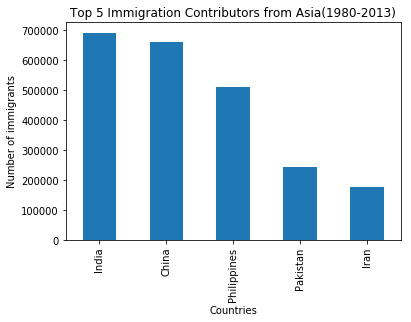

In [19]:
# plot immigration pattern of top 5 countries
df_top5.transpose().plot(kind = 'bar')
plt.title('Top 5 Immigration Contributors from Asia(1980-2013)')
plt.ylabel('Number of immigrants')
plt.xlabel('Countries')
plt.show()

In [7]:
df_canada.set_index('Country', inplace=True)

# ANSWER 2(B)

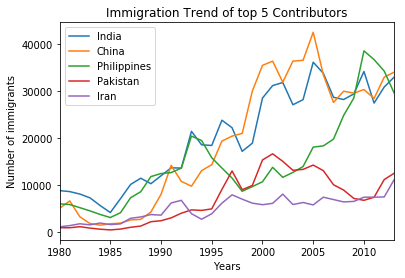

In [8]:
df_trend = df_canada.loc[df_top5.index, years]
df_trend.transpose().plot(kind = 'line')
plt.title('Immigration Trend of top 5 Contributors')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

# SOME PRE-CALCULATIONS FOR 2(C)

In [11]:
t5 = df_canada.loc[top5]
t5  = t5.groupby(['Country'], axis = 0).sum()
t5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391


In [17]:
df_canada.loc[:,years].sum(axis=0)

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

In [12]:
# CALCULATING PERCENTAGE OF EACH COUNTRY WITH TOTAL IMMIGRATION FOR EACH YEAR FROM 1980-2013
# EG: CHINA IN 1980 -  5123/99137 = 5.16%  , SIMILARLY FOR OTHER COUNTRIES IN TOP 5
perc_list = []
for i in years:
    perc = []
    for k in range(len(top5)):
        perc.append((t5.iloc[k][i]/df_canada.loc[:,i].sum(axis=0))*100)
    perc_list.append(perc)
perc_list

[[5.1675963565570875,
  8.957301512048984,
  1.1822024067704289,
  0.9865136124756649,
  6.103674712771215],
 [6.043613143637564,
  7.841683022349249,
  1.2924757830377251,
  0.879136781744345,
  5.355317782621673],
 [3.172502421574551,
  7.813294204524748,
  1.7473698343738913,
  1.1518063507590797,
  5.033997947655628],
 [2.465916611515553,
  9.71277299801456,
  2.1072137657180674,
  1.1912640635340834,
  6.038385175380543],
 [2.07989975073893,
  7.769317732950134,
  2.692836808913467,
  0.909871010801313,
  5.177275018047591],
 [2.595101317556946,
  6.0176055331675675,
  2.3550258652719425,
  0.7345165623481665,
  4.501414730343822],
 [2.277798438081071,
  8.309315730754928,
  2.084882856080327,
  0.8030401636296021,
  4.8414838229825214],
 [1.9611043918943984,
  7.560231800609923,
  2.2178361813743313,
  0.7954233477528547,
  5.461115521885272],
 [1.9798142219287038,
  8.271000531204686,
  2.3495039696782625,
  0.9576041232969148,
  6.201455787977546],
 [2.6290503065096815,
  6.290

In [13]:
# CONVERTING THE ABOVE PERCENTAGES INTO A DATAFRAME FOR FURTHER PLOTTING
df1 = pd.DataFrame(perc_list, index = years, columns = t5.index )
df1

Country,China,India,Iran,Pakistan,Philippines
1980,5.167596,8.957302,1.182202,0.986514,6.103675
1981,6.043613,7.841683,1.292476,0.879137,5.355318
1982,3.172502,7.813294,1.747370,1.151806,5.033998
1983,2.465917,9.712773,2.107214,1.191264,6.038385
1984,2.079900,7.769318,2.692837,0.909871,5.177275
1985,2.595101,6.017606,2.355026,0.734517,4.501415
1986,2.277798,8.309316,2.084883,0.803040,4.841484
1987,1.961104,7.560232,2.217836,0.795423,5.461116
1988,1.979814,8.271001,2.349504,0.957604,6.201456
1989,2.629050,6.290138,2.299431,1.375036,7.215749


# ANSWER 2(C)

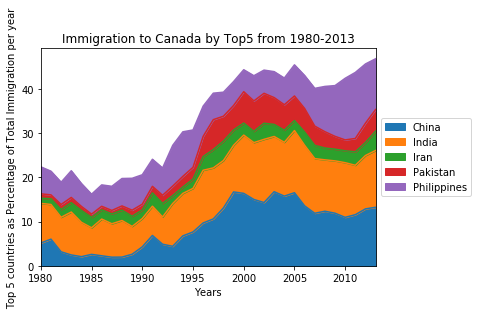

In [16]:
#HERE WE CAN SEE CONTRIBUTION OF EACH OF THE TOP 5 COUNTRIES OVER 1980-2013
#EG FOR 1980:  5.167596(China) + 8.957302(Ind) + 1.182202(Iran) + 0.986514(Pak) + 6.103675(Philippines) = 22.397289% OF TOTAL IMMIGRATION IN 1980
df1.plot(kind='area', stacked=True)
plt.title('Immigration to Canada by Top5 from 1980-2013')
plt.ylabel('Top 5 countries as Percentage of Total Immigration per year')
plt.xlabel('Years')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()